In [1]:
# importações
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numba import njit


In [2]:
n = 500 # Network size
tf = 5000 # Iteration time
trans = tf - 50 # Transient time
sample_size = tf - trans # Size of the actual data
a = 3.8 # Logistic map parameter
xmin = 0 # Minimum allowed value of x
xmax = 1 # Maximum allowed value of x
prd = 1

# Funções

Acoplamento global 

$$x_{t+1}^i = f(x_t^i) + \frac{\sigma}{N}\sum_{j=0}^{N} x_t^j$$

In [3]:
@njit
def network(x, sigma, a):
    # x = x_t^i, with i in [0,n]
    xout = np.zeros(len(x)) # x_t+1

    f = a*x*(1 - x) # Logistic map

    for i in range(n): # Global coupling
        coup = 0 # Weight
        for k in range(n):
            coup += f[k % n]
        xout[i] = f[i] + sigma*coup/n

    return xout



# Run

xdata = np.zeros((n, sample_size))
#np.random.seed(12031934)
np.random.seed(12031935)
x0 = np.random.rand(n)
#x0[:40] = 0.5
sigma = 0.03


state = 1
for i in range(tf):
    x = network(x0, sigma, a)
    if np.any(np.isnan(x)):
        print('NaN in x')
        state = -1
        break
    if i >= trans:
        xdata[:, i - trans] = x0
    x0 = x
print(f'state: {state}')

x_series = pd.Series(x0)

In [4]:
def plota(x, sigma):
    fig, ax = plt.subplots()
    sns.scatterplot(data = x, ax=ax, s=3.5, color='b')
    ax.set_title(f'$\sigma={sigma}$')
    ax.set_ylim(-0.05,1.05)
    plt.show()

In [5]:
def varre_sigma(sigma):
    xdata = np.zeros((n, sample_size))
    np.random.seed(12031934)
    x0 = np.random.rand(n)
    #x0[:40] = 0.5

    state = 1
    for i in range(tf):
        x = network(x0, sigma, a)
        if np.any(np.isnan(x)):
            print('NaN in x')
            state = -1
            break
        if i >= trans:
            xdata[:, i - trans] = x0
        x0 = x
    print(f'state: {state}')
    x_series = pd.Series(x0)
    plota(x_series, sigma)

state: 1


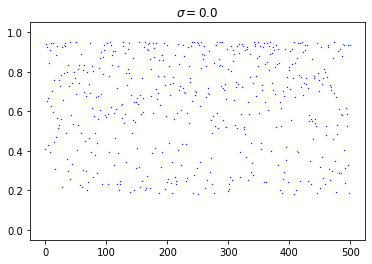

state: 1


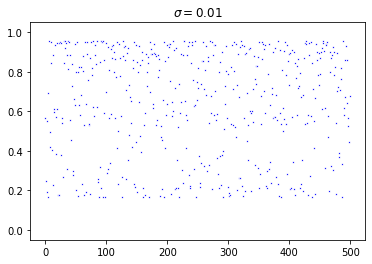

state: 1


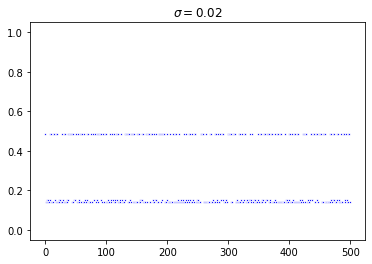

state: 1


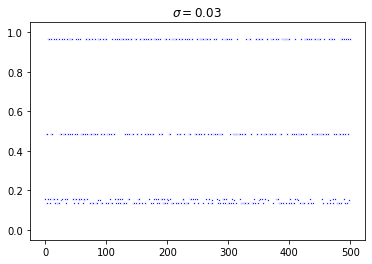

state: 1


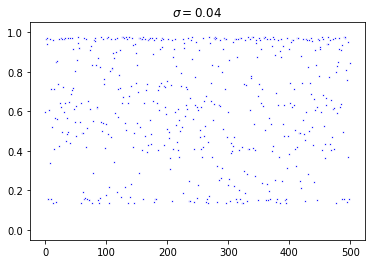

state: 1


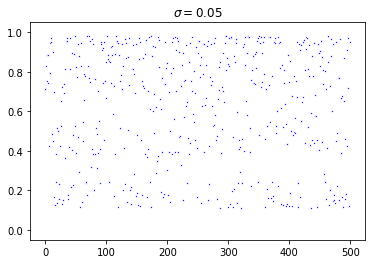

state: 1


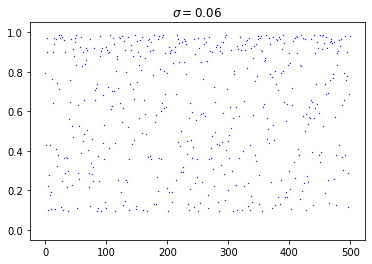

state: 1


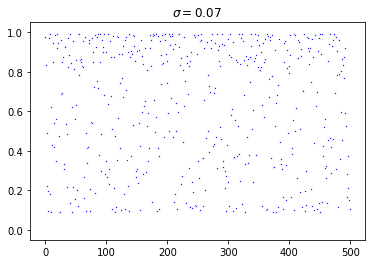

state: 1


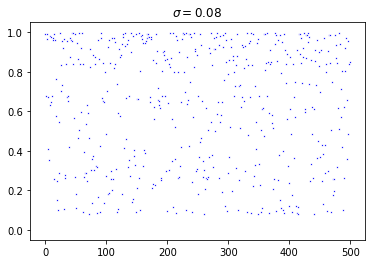

state: 1


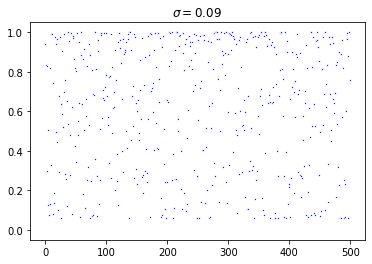

In [6]:
for sigma in np.arange(0,0.1,0.01):
    varre_sigma(sigma)

In [16]:
! gcc logistico-rede-global.c -o x.x
! ./x.x

dado_patricio = pd.read_csv('logredeglobal.dat', sep='\t',
                           header=None)
dado_patricio.columns = ['mapas','valor']
dado_patricio.head(102)

,mapas,valor
0,1,0.174760
1,2,0.437879
2,3,0.962514
3,4,0.919995
4,5,0.630889
...,...,...
97,98,0.480161
98,99,0.927669
99,100,0.949458
100,1,0.556771


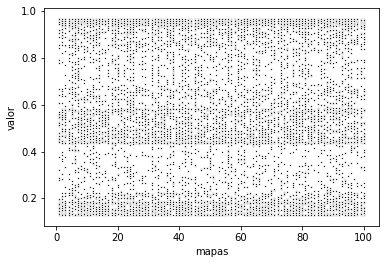

In [17]:
sns.scatterplot(data = dado_patricio, 
               x='mapas', y = 'valor', color='black', s=3.5)